In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statistics import median
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 100
from sklearn.metrics import mean_absolute_error as mae
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
df = pd.read_csv('/Users/nihal/BACapstone/tesla_vehicle_sales.csv')

In [3]:
df.head()

,Data Year,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
0,2009,Alameda,Electric,Tesla,Roadster,5
1,2009,Contra Costa,Electric,Tesla,Roadster,1
2,2009,Kern,Electric,Tesla,Roadster,1
3,2009,Los Angeles,Electric,Tesla,Roadster,23
4,2009,Marin,Electric,Tesla,Roadster,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data Year           1576 non-null   int64 
 1   County              1576 non-null   object
 2   FUEL_TYPE           1576 non-null   object
 3   MAKE                1576 non-null   object
 4   MODEL               1576 non-null   object
 5   Number of Vehicles  1576 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 74.0+ KB


In [5]:
df

,Data Year,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
0,2009,Alameda,Electric,Tesla,Roadster,5
1,2009,Contra Costa,Electric,Tesla,Roadster,1
2,2009,Kern,Electric,Tesla,Roadster,1
3,2009,Los Angeles,Electric,Tesla,Roadster,23
4,2009,Marin,Electric,Tesla,Roadster,1
...,...,...,...,...,...,...
1571,2023,Yolo,Electric,Tesla,Model S,3
1572,2023,Yolo,Electric,Tesla,Model X,6
1573,2023,Yolo,Electric,Tesla,Model Y,104
1574,2023,Yuba,Electric,Tesla,Model 3,6


In [6]:
df_numeric = df._get_numeric_data()

<Axes: >

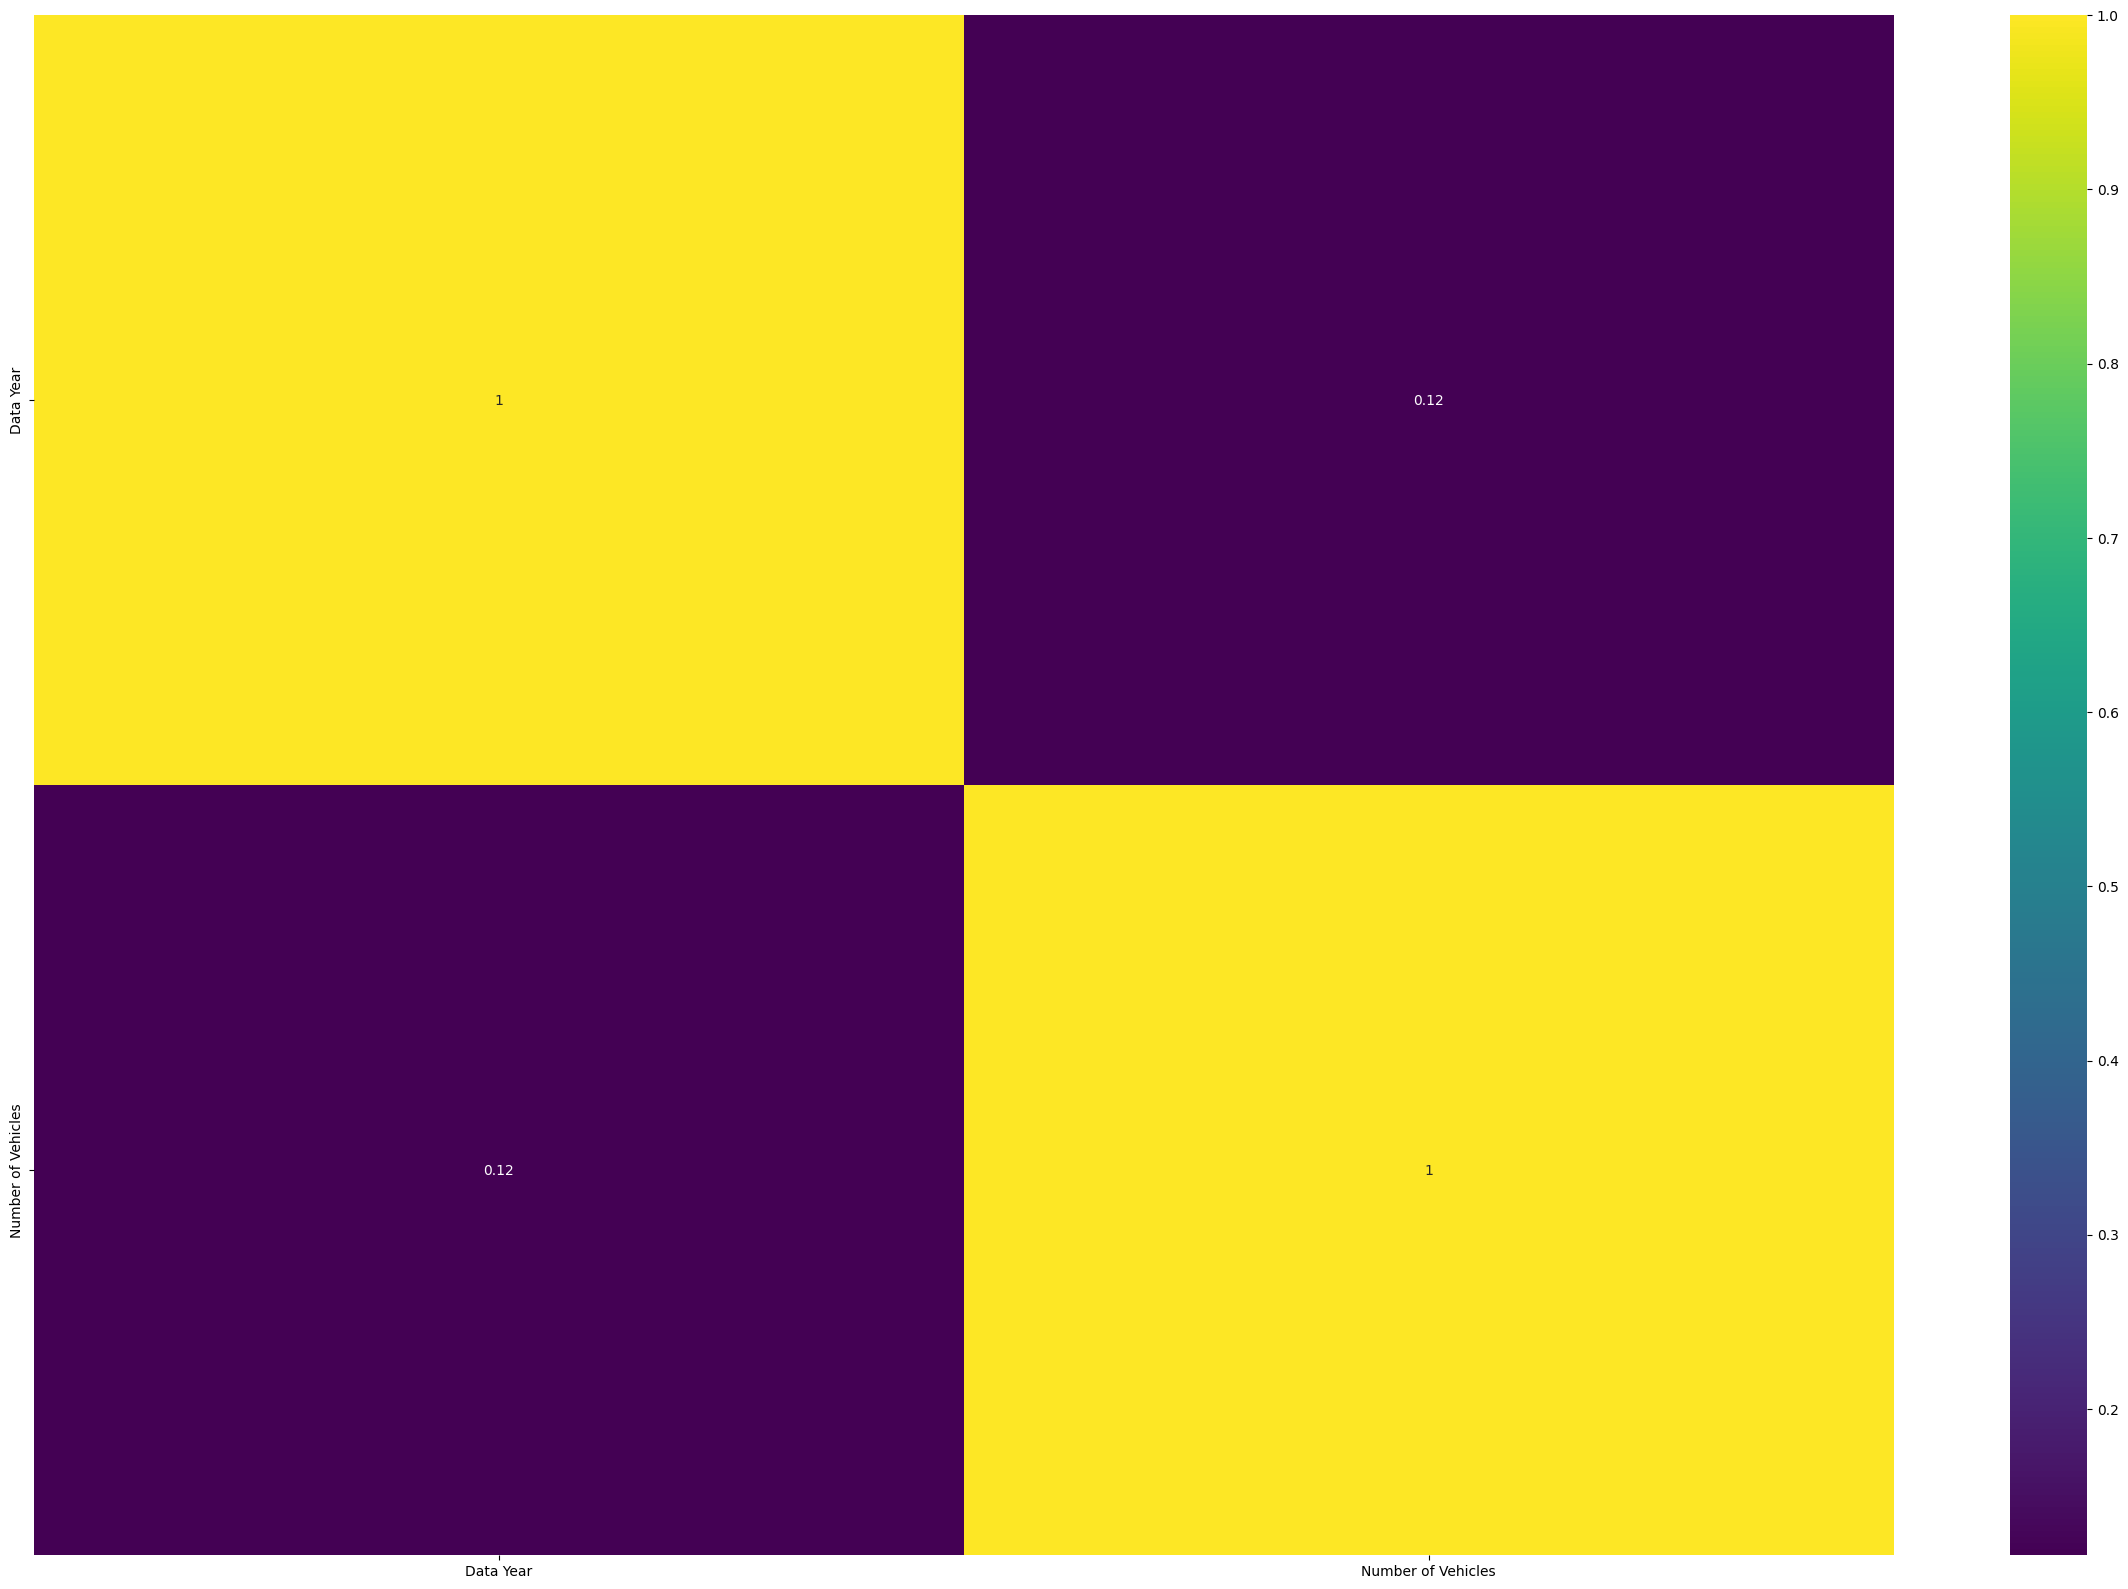

In [7]:
corr = df_numeric.corr()
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(corr, cmap="viridis", annot=True)

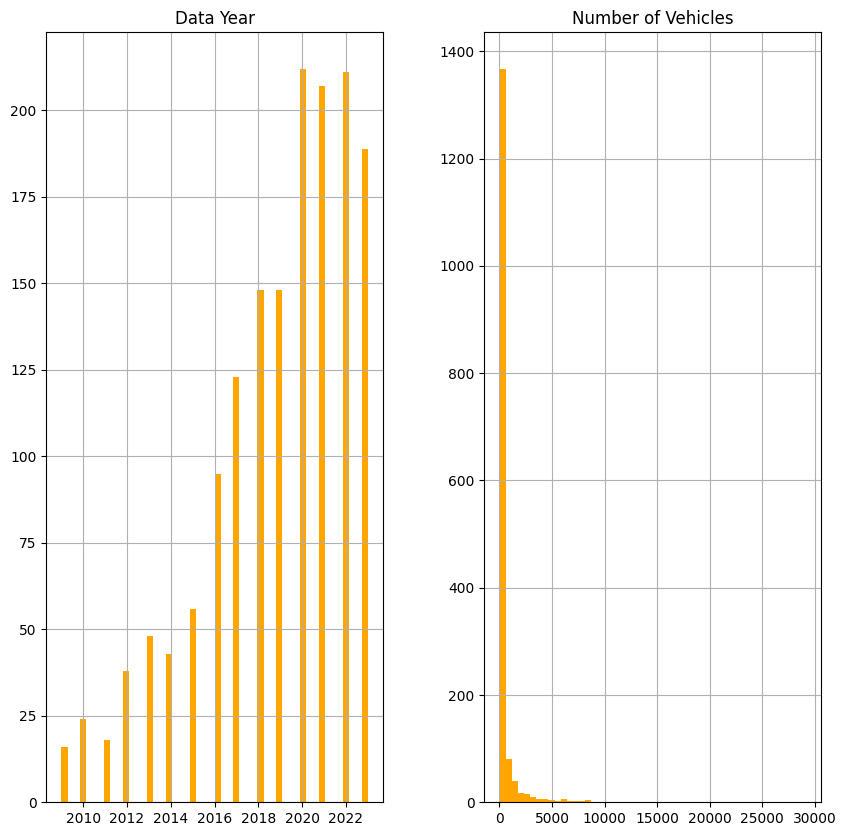

In [8]:
df_numeric.hist(figsize=(10,10), color='orange' ,bins=50, xlabelsize=10, ylabelsize=10);

<Axes: ylabel='Number of Vehicles'>

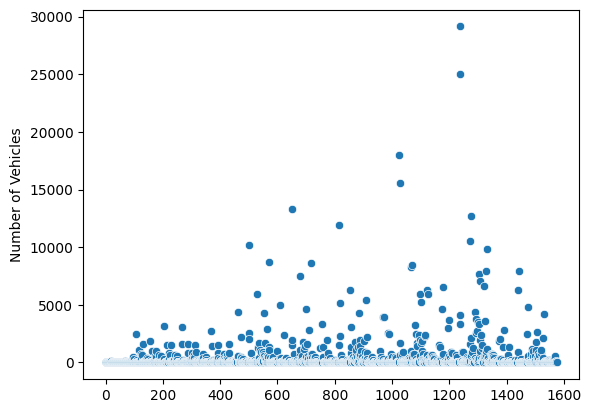

In [9]:
fig, ax = plt.subplots()
sns.scatterplot(df['Number of Vehicles'])

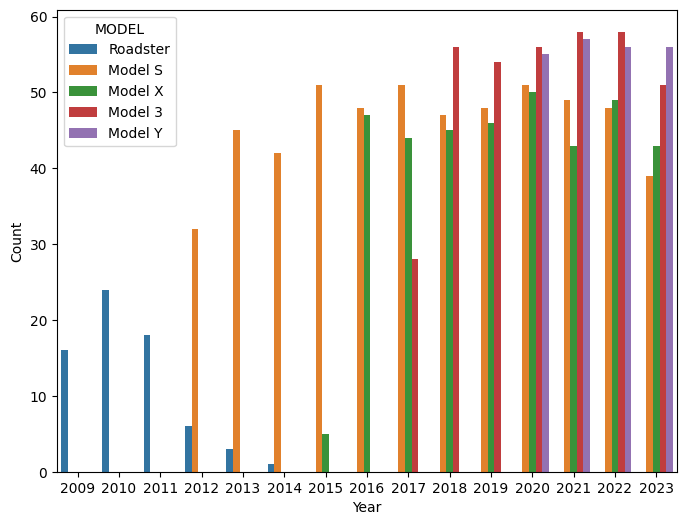

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=df['Data Year'], hue=df['MODEL'], ax=ax)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

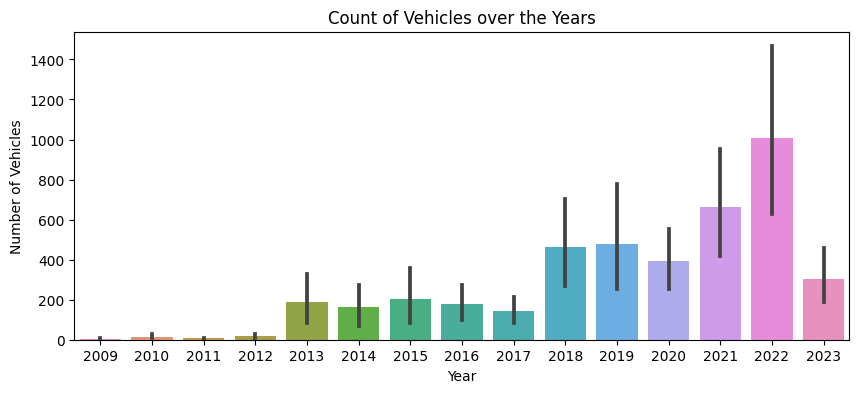

In [11]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df['Data Year'], y=df['Number of Vehicles'])
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Count of Vehicles over the Years')
plt.show()

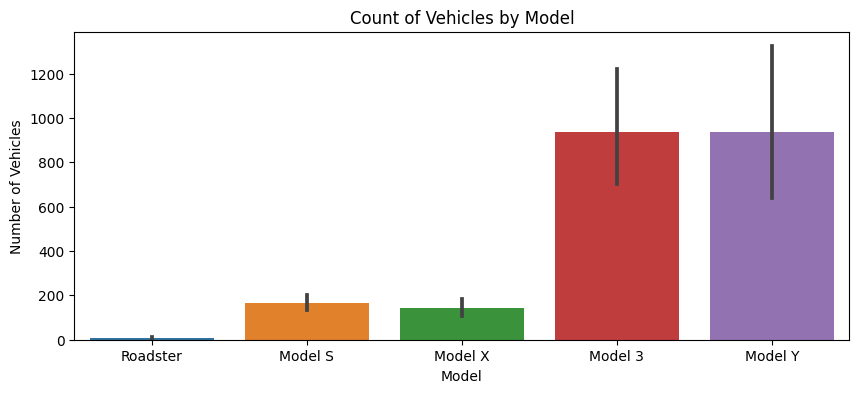

In [12]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df['MODEL'], y=df['Number of Vehicles'])
plt.xlabel('Model')
plt.ylabel('Number of Vehicles')
plt.title('Count of Vehicles by Model')
plt.show()

In [13]:
one_hot = pd.get_dummies(df["MODEL"], prefix='MODEL')
df = df.drop("MODEL", axis=1)
df = pd.concat([df, one_hot], axis=1)

In [14]:
df

,Data Year,County,FUEL_TYPE,MAKE,Number of Vehicles,MODEL_Model 3,MODEL_Model S,MODEL_Model X,MODEL_Model Y,MODEL_Roadster
0,2009,Alameda,Electric,Tesla,5,False,False,False,False,True
1,2009,Contra Costa,Electric,Tesla,1,False,False,False,False,True
2,2009,Kern,Electric,Tesla,1,False,False,False,False,True
3,2009,Los Angeles,Electric,Tesla,23,False,False,False,False,True
4,2009,Marin,Electric,Tesla,1,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
1571,2023,Yolo,Electric,Tesla,3,False,True,False,False,False
1572,2023,Yolo,Electric,Tesla,6,False,False,True,False,False
1573,2023,Yolo,Electric,Tesla,104,False,False,False,True,False
1574,2023,Yuba,Electric,Tesla,6,True,False,False,False,False


In [15]:
columns_to_drop = ["County", "FUEL_TYPE", "MAKE"]

In [16]:
df.drop(columns=columns_to_drop, inplace=True)

In [17]:
df

,Data Year,Number of Vehicles,MODEL_Model 3,MODEL_Model S,MODEL_Model X,MODEL_Model Y,MODEL_Roadster
0,2009,5,False,False,False,False,True
1,2009,1,False,False,False,False,True
2,2009,1,False,False,False,False,True
3,2009,23,False,False,False,False,True
4,2009,1,False,False,False,False,True
...,...,...,...,...,...,...,...
1571,2023,3,False,True,False,False,False
1572,2023,6,False,False,True,False,False
1573,2023,104,False,False,False,True,False
1574,2023,6,True,False,False,False,False


<Axes: >

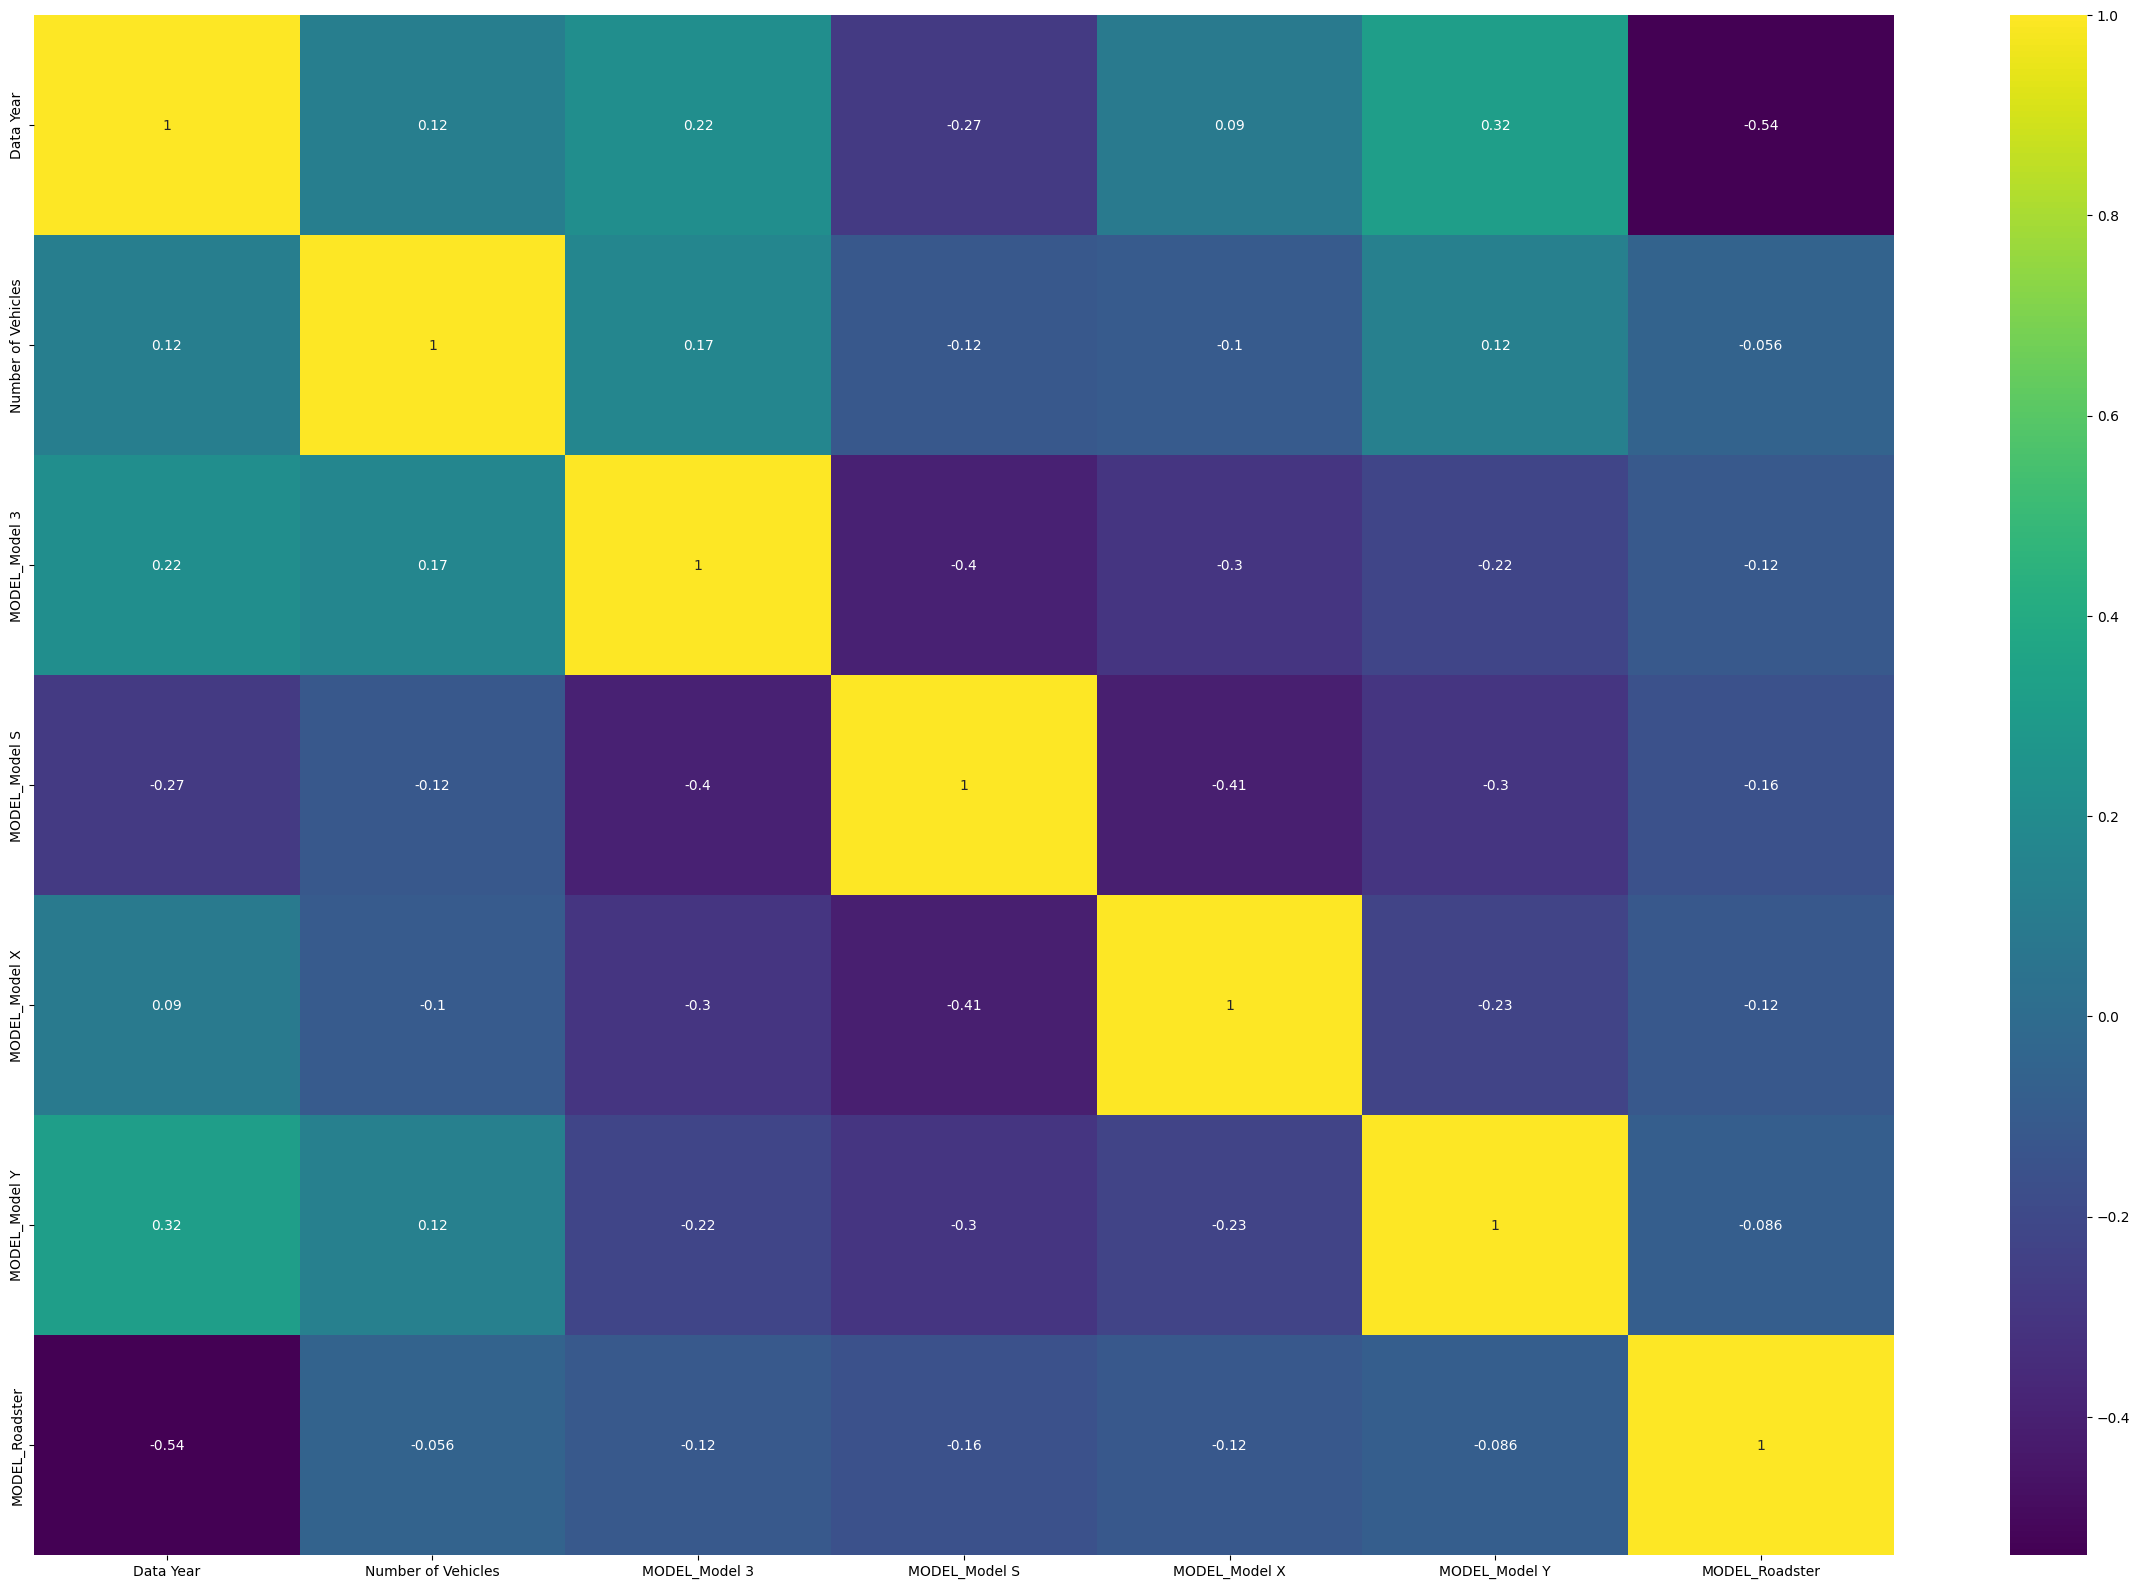

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(corr, cmap="viridis", annot=True)

In [19]:
X = df.drop('Number of Vehicles',axis=1)
y = df['Number of Vehicles']

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Support Vector Regressor": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [22]:
results = {
    "Model": [],
    "R^2 Score": [],
    "Mean Absolute Error (MAE)": [],
    "Mean Squared Error (MSE)": [],
    "Root Mean Squared Error (RMSE)": []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    
    results["Model"].append(name)
    results["R^2 Score"].append(metrics.r2_score(y_valid, predictions))
    results["Mean Absolute Error (MAE)"].append(metrics.mean_absolute_error(y_valid, predictions))
    results["Mean Squared Error (MSE)"].append(metrics.mean_squared_error(y_valid, predictions))
    results["Root Mean Squared Error (RMSE)"].append(np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

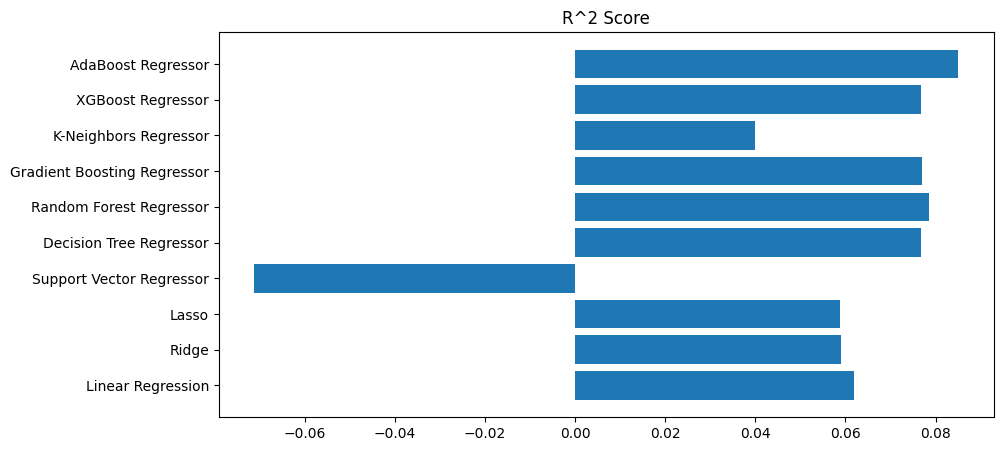

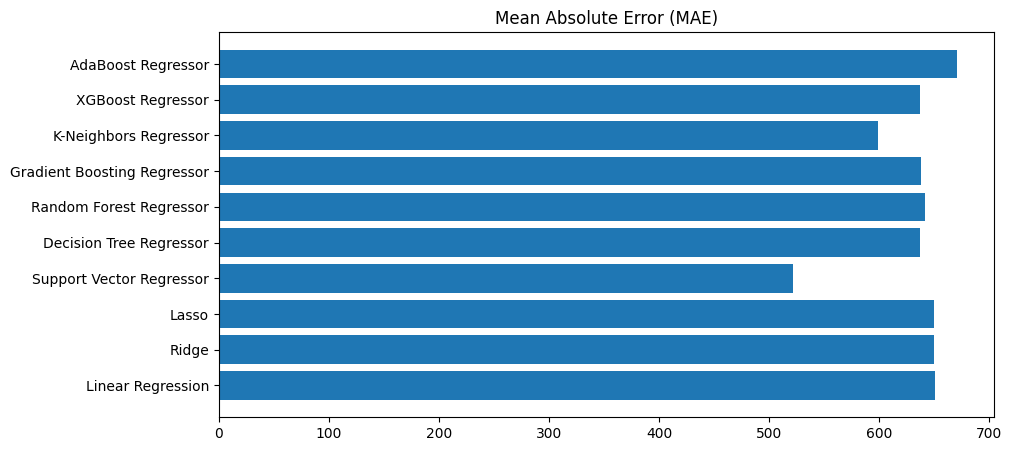

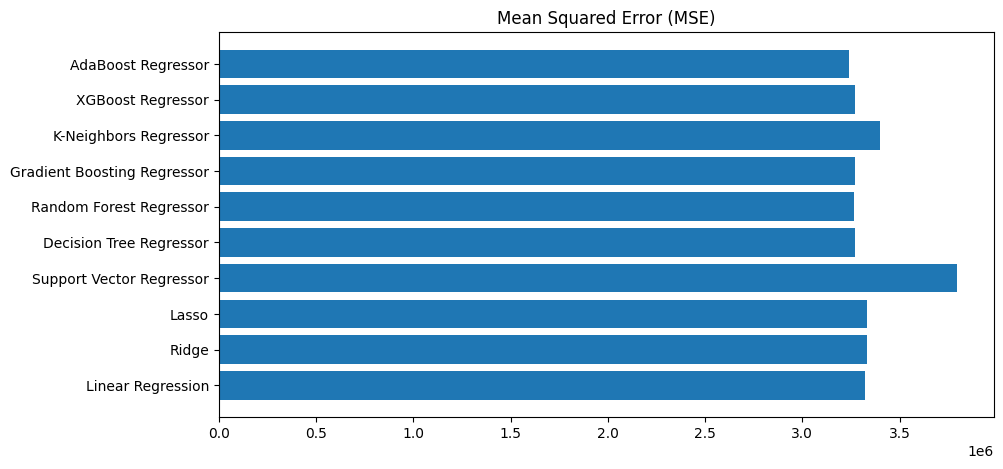

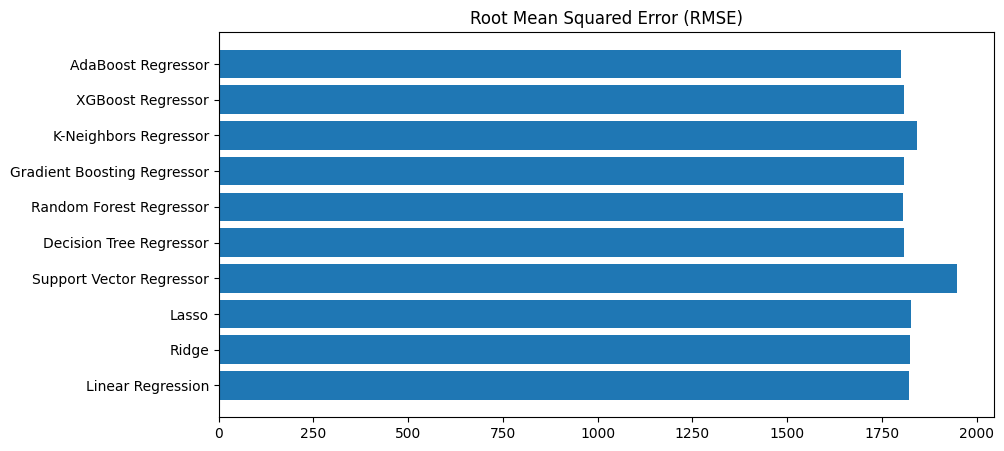

In [23]:
results_df = pd.DataFrame(results)
metrics_to_plot = ["R^2 Score", "Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)"]
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    plt.barh(results_df["Model"], results_df[metric])
    plt.title(metric)
    plt.show()

In [24]:
results_df

,Model,R^2 Score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE)
0,Linear Regression,0.061891,650.553797,3.322502e+06,1822.773128
1,Ridge,0.059010,649.823492,3.332708e+06,1825.570606
2,Lasso,0.058676,649.788444,3.333890e+06,1825.894255
3,Support Vector Regressor,-0.071252,521.272611,3.794057e+06,1947.833928
4,Decision Tree Regressor,0.076793,637.325371,3.269724e+06,1808.237939
5,Random Forest Regressor,0.078563,641.497963,3.263455e+06,1806.503489
6,Gradient Boosting Regressor,0.076955,637.563956,3.269151e+06,1808.079402
7,K-Neighbors Regressor,0.040028,598.644937,3.399935e+06,1843.891217
8,XGBoost Regressor,0.076793,637.325384,3.269724e+06,1808.237935
9,AdaBoost Regressor,0.085077,670.511544,3.240384e+06,1800.106697


In [25]:
# AdaBoost Regressor seems to be the best model for predicting the Number of Vehicles. Due to limited data, the
# r2 scores are less. The more training data is available, the better predictions and variability can be explained.